In [1]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn
from scipy.stats import zscore
import somoclu
import seaborn
#import Orange
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from Orange.projection.pca import PCA
from scipy.cluster.hierarchy import fcluster


C:\Anaconda2\envs\py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
filedata= 'D:/Development/mestrado/uma/dataset/db_fm_training.csv'
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
#dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],index_col='date',date_parser=dateparse)
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],date_parser=dateparse)
#dataframe = pd.read_csv(filedata, engine='python', sep=','skiprows=1, usecols=range(1,ncols+1))
df = pd.read_csv(filedata, engine='python', sep=';')

In [15]:
df.head()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
0,0.853,0.609,-66.728,-20.042,10.836,148.692,0.713
1,0.909,0.800,-61.816,-19.071,15.236,205.652,0.601
2,0.963,0.818,-61.778,-18.862,16.395,251.339,0.587
3,0.940,0.889,-63.843,-19.436,14.816,232.213,0.586
4,0.952,0.900,-61.796,-19.403,14.402,191.574,0.629


In [46]:
#cols = list(df.columns)
#df[cols]
## now iterate over the remaining columns and create a new zscore column
#for col in cols:
#    col_zscore = col + '_zscore'
#    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
#df.head()
df_zscore = df.apply(zscore)
df_zscore

NameError: name 'df' is not defined

In [6]:
dataset = df.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
som = Orange.projection.som.SOMLearner(map_shape=(8, 8), initialize=Orange.projection.som.InitializeRandom)
data = Orange.data.table("iris.tab")
map = som(data)

NameError: name 'Orange' is not defined

In [3]:
from Orange.projection.pca import PCA

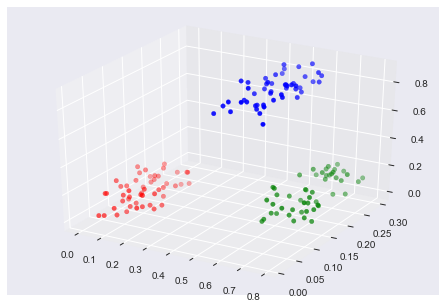

In [2]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)

In [5]:
data2 = np.float32(np.concatenate((c3, c2, c1)))

In [3]:
n_rows, n_columns = 10, 12
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data)

Wall time: 74 ms


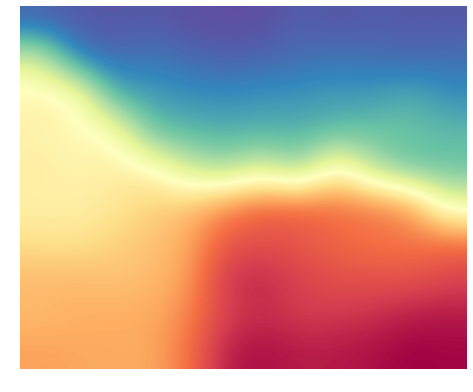

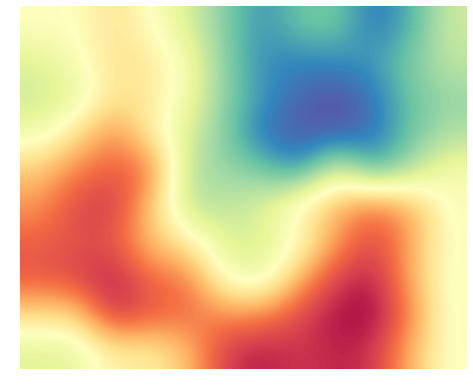

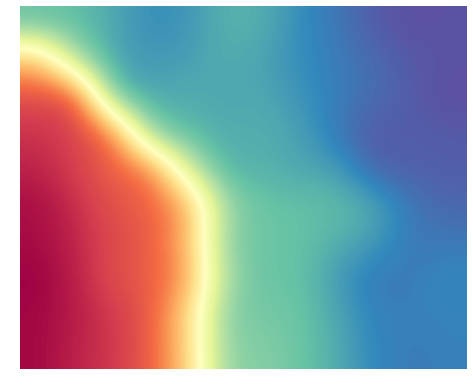

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
som.view_component_planes()

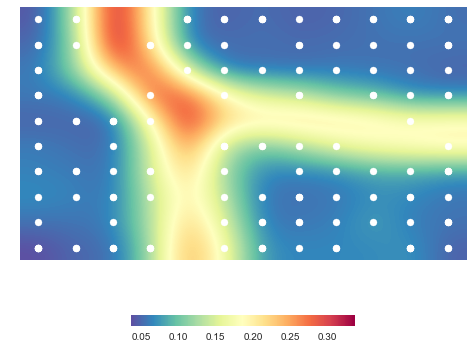

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
#som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.view_umatrix(bestmatches=True,colorbar=1)
#som.view_similarity_matrix()

### Identify the BMUs of the activation map
- Som.get_surface_state(): Return the dot product of the codebook and the data.
- get_bmus() : Return Best Matching Unit indexes of the activation map.

In [114]:
bmus = som.get_bmus(som.get_surface_state())

In [149]:
bmus

array([[ 5,  2],
       [ 4,  0],
       [ 3,  0],
       [ 5,  3],
       [10,  3],
       [ 2,  0],
       [ 8,  0],
       [ 3,  2],
       [ 4,  2],
       [10,  3],
       [11,  1],
       [ 9,  1],
       [ 6,  0],
       [ 0,  0],
       [ 4,  0],
       [ 7,  3],
       [ 0,  0],
       [ 3,  1],
       [ 9,  1],
       [ 6,  3],
       [ 8,  2],
       [ 5,  0],
       [11,  1],
       [ 6,  2],
       [ 7,  1],
       [ 9,  3],
       [ 3,  0],
       [11,  0],
       [ 7,  1],
       [ 9,  2],
       [11,  4],
       [11,  2],
       [11,  4],
       [ 8,  3],
       [ 6,  0],
       [ 3,  1],
       [ 5,  0],
       [10,  4],
       [ 1,  0],
       [ 7,  0],
       [ 3,  2],
       [11,  1],
       [10,  0],
       [ 4,  3],
       [ 7,  3],
       [ 9,  0],
       [ 7,  0],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [ 9,  6],
       [10,  6],
       [11,  9],
       [ 5,  6],
       [ 7,  8],
       [ 8,  8],
       [ 8,  9],
       [ 9,  9],
       [11,  8

In [146]:
clusters.shape
cr = clusters.reshape(10,12)
print(clusters)
print(cr)
cr.shape

[1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 3
 3 3 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 2 2 2 2 2 2 1 3 3
 3 3 3 2 2 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 3 3 3
 3 3 2 2 2 2 2 2 2]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [3 1 1 1 1 1 1 1 1 1 1 1]
 [3 3 1 1 1 1 1 1 1 1 1 1]
 [3 3 3 1 1 1 1 1 1 1 1 1]
 [3 3 3 3 1 1 1 1 1 1 1 1]
 [3 3 3 3 3 2 2 2 2 2 2 1]
 [3 3 3 3 3 2 2 2 2 2 2 2]
 [3 3 3 3 3 2 2 2 2 2 2 2]
 [3 3 3 3 3 2 2 2 2 2 2 2]
 [3 3 3 3 3 2 2 2 2 2 2 2]]


(10, 12)

In [152]:
def cluster_data(bmus,clusters):
    cluster_data = []
    row, column = bmus.shape
    cr = clusters.reshape(10,12)
    for r in range(row):
        cluster_data.append(cr[bmus[r][1]][bmus[r][0]])##aparentemente a funcao get_bmus retorna (coluna,linha)
    return cluster_data
    

In [158]:
cluster1 = cluster_data(bmus,clusters)
newcluster = cluster_data(new_bmus,clusters)
print(cluster1)
print(newcluster)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [111]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))

In [142]:
new_bmus.shape

(150, 2)

In [24]:
#som.codebook[0][50]
som.codebook.shape
W
#NBMU

array([[ 0.05281124,  0.15690543,  0.19446047],
       [ 0.0358347 ,  0.1557093 ,  0.1869209 ],
       [ 0.02969677,  0.18148981,  0.15785986],
       [ 0.0372312 ,  0.15804926,  0.11543062],
       [ 0.02319583,  0.12468534,  0.12832566],
       [ 0.02000786,  0.08934496,  0.17172112],
       [ 0.01915076,  0.05449023,  0.16782847],
       [ 0.04341319,  0.08159867,  0.11641203],
       [ 0.02902054,  0.08629476,  0.08540242],
       [ 0.0399828 ,  0.0409941 ,  0.04094053],
       [ 0.03302694,  0.06907275,  0.02352801],
       [ 0.03469513,  0.11945315,  0.02860305],
       [ 0.31829244,  0.12867488,  0.59619784],
       [ 0.09604325,  0.14987366,  0.2750603 ],
       [ 0.06371313,  0.1802225 ,  0.14702165],
       [ 0.08062932,  0.17616026,  0.13594984],
       [ 0.06164695,  0.1477135 ,  0.14016587],
       [ 0.04811571,  0.09006678,  0.16509724],
       [ 0.05456309,  0.05271843,  0.14847802],
       [ 0.0665081 ,  0.04998748,  0.11648379],
       [ 0.07575512,  0.05289765,  0.092

For a new data 'data' 
 - reshapes the (10,12,3) code book to W (120,3)
 - store data in X
 - Calculate the distance between the data and the codebooks
 - create a BMU (150,120) for each instance of the data with the activated neurons
 - reshape BMU to NBMU(150,10,12)
 - new_bmus (150,2) - for each instance of the data the codebook where it was allocated

In [154]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))
X = data2
D = -2*np.dot(W, X.T) + (W**2).sum(1)[:, None] + (X**2).sum(1)[:, None].T
BMU = (D==D.min(0)[None,:]).astype("float32").T
NBMU =  BMU.reshape((X.shape[0], som.codebook.shape[0], som.codebook.shape[1]))
new_bmus = np.vstack(NBMU.nonzero()[1:][::-1]).T

In [143]:
print(som.codebook[1][0])
print(W[12])

[ 0.31829244  0.12867488  0.59619784]
[ 0.31829244  0.12867488  0.59619784]


In [9]:
bmus = som.get_bmus(som.get_surface_state())

In [113]:
bmus.shape

(150, 2)

In [34]:
# generate the linkage matrix
Z = linkage(W, 'ward')

In [29]:
#This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances
c, coph_dists = cophenet(Z, pdist(W))
c

0.90895053377036128

In [39]:
Z.shape

(119, 4)

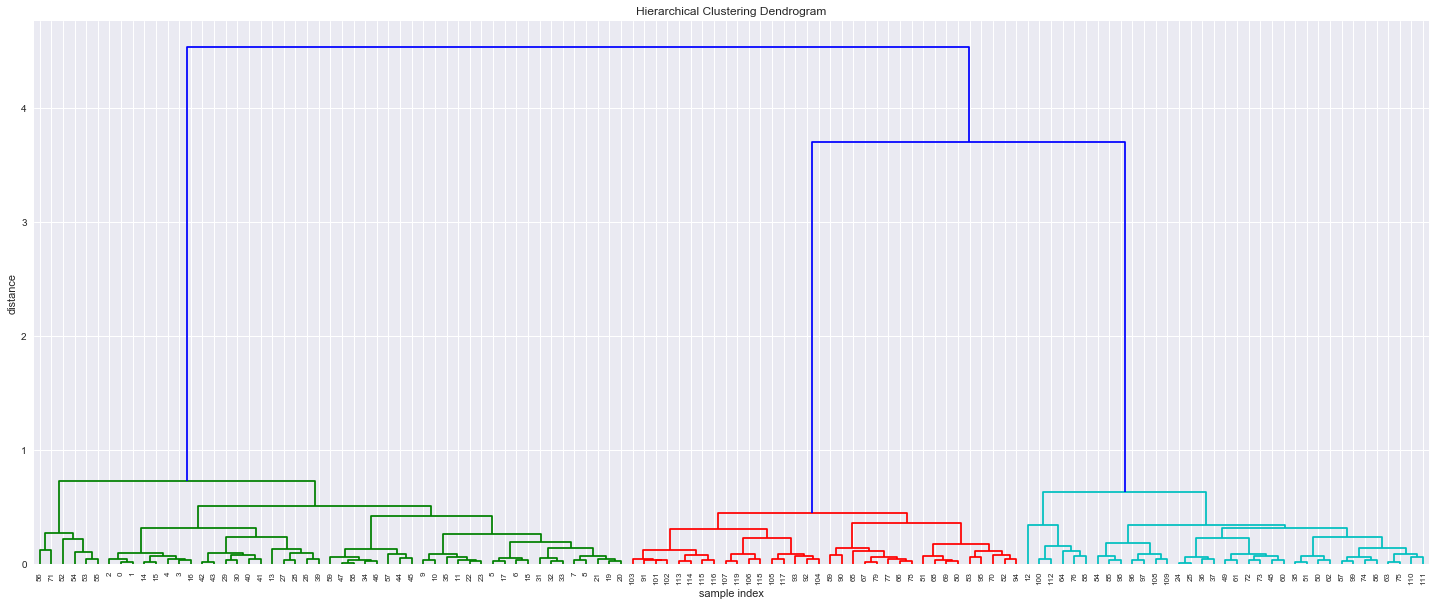

In [40]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [41]:
Z[-4:,2]

array([ 0.63027481,  0.72835224,  3.69856578,  4.53661492])

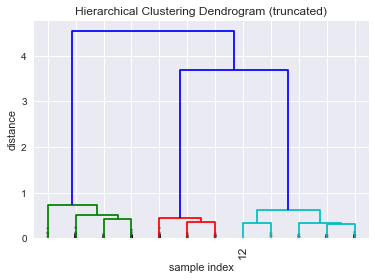

In [42]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

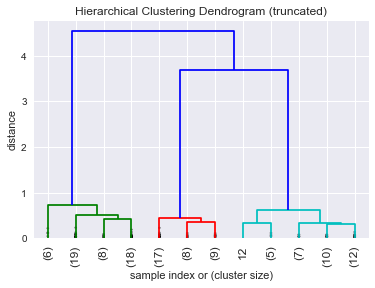

In [43]:

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [44]:
6+19+8+18+17+8+9+12+5+7+10+12

131

In [75]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[  0.1490833 ,   0.11644832,   5.        ,   1.65352898],
       [  0.10762665,   0.09592477,  22.        ,   2.49143304],
       [  0.09670222,   0.08501875,  15.        ,   3.08667356],
       [  0.09642499,   0.09834785,  20.        ,   3.31619141],
       [  0.11671698,   0.10770744,  26.        ,   3.12876557],
       [  0.127658  ,   0.12315643,  27.        ,   3.10264458],
       [  0.1672578 ,   0.14982615,  20.        ,   3.09036179],
       [  0.20423238,   0.17223577,  21.        ,   3.0430373 ],
       [  0.32062653,   0.6764242 ,  28.        ,   4.99381784],
       [  0.57275861,   1.04007942,  27.        ,   3.81110927]])

## Determining the cluster

## Determining the cluster
### Knowing Max distance
Let's say we determined the max distance with help of a dendrogram, then we can do the following to get the cluster id for each of our samples:

In [77]:
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

### Knowing K

In [126]:
k=3
clusters = fcluster(Z, k, criterion='maxclust')

### Using the Inconsistency Method (default):
The following shows a matrix of the avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with depth = 5

If you're really sure you want to use the inconsistency method to determine the number of clusters in your dataset, you can use the default criterion of fcluster() and hope you picked the correct values:

In [87]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[  0.1490833 ,   0.11644832,   5.        ,   1.65352898],
       [  0.10762665,   0.09592477,  22.        ,   2.49143304],
       [  0.09670222,   0.08501875,  15.        ,   3.08667356],
       [  0.09642499,   0.09834785,  20.        ,   3.31619141],
       [  0.11671698,   0.10770744,  26.        ,   3.12876557],
       [  0.127658  ,   0.12315643,  27.        ,   3.10264458],
       [  0.1672578 ,   0.14982615,  20.        ,   3.09036179],
       [  0.20423238,   0.17223577,  21.        ,   3.0430373 ],
       [  0.32062653,   0.6764242 ,  28.        ,   4.99381784],
       [  0.57275861,   1.04007942,  27.        ,   3.81110927]])

In [116]:
fcluster(Z, 4, depth=5)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

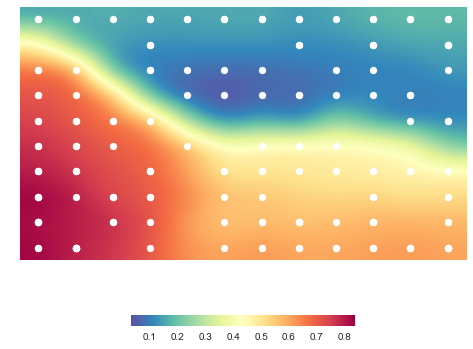

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [81]:
#Plot the activation map of a given data instance or a new data vector
som.view_activation_map(data_index=3,bestmatches=True,colorbar=1)

In [101]:
### silhouette_score
ss = fcluster(Z, 3, criterion='maxclust')

In [102]:
print(W.shape)
print(ss.shape)

(120, 3)
(120,)


In [110]:
for n in range(6,0,-1):
    print(n)

6
5
4
3
2
1


In [112]:
#sklearn.metrics.silhouette_score(W, ss, metric='sqeuclidean')
for n in range(10,1,-1):
    clusters = fcluster(Z, n, criterion='maxclust')
    ss = sklearn.metrics.silhouette_score(W, clusters,metric='euclidean')
    print(n,ss)

10 0.269884
9 0.331529
8 0.325482
7 0.320939
6 0.433524
5 0.513958
4 0.59447
3 0.738317
2 0.553551


In [224]:
som.view_activation_map(data_vector=data2[0],bestmatches=True)

ValueError: not enough values to unpack (expected 2, got 1)